In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"A:\my_codes\my_project\Machine Learning\Supervised Machine Learning\Regression\Ridge Regression\Combined Cycle Power Plant Energy Output Prediction\CCPP_data.csv",encoding='unicode_escape')
df

,ï»¿AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
df.columns

Index(['ï»¿AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [4]:
df.isnull().sum()

ï»¿AT    0
V        0
AP       0
RH       0
PE       0
dtype: int64

In [5]:
X = df[['ï»¿AT', 'V', 'AP', 'RH']]
Y = df['PE']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [7]:
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(X_train.fillna(X_train.median()), Y_train)

best_alpha = ridge_cv.alpha_
print("Best alpha:", best_alpha)

Best alpha: 33.9322177189533


In [8]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=best_alpha))
])


In [9]:
X_train

,ï»¿AT,V,AP,RH
5487,21.92,49.02,1009.29,88.56
3522,11.09,40.43,1025.47,74.97
6916,8.49,39.61,1021.05,87.74
7544,11.43,44.78,1013.43,82.45
7600,17.28,39.99,1007.09,74.25
...,...,...,...,...
5734,23.39,61.87,1010.35,48.91
5191,11.63,40.55,1022.89,87.12
5390,27.79,69.23,1012.86,45.71
860,12.26,41.50,1014.87,89.41


In [10]:
Y_train

5487    443.31
3522    490.96
6916    483.94
7544    471.09
7600    463.28
         ...  
5734    444.03
5191    474.67
5390    435.06
860     471.13
7270    472.43
Name: PE, Length: 7654, dtype: float64

In [11]:
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
Y_pred

array([455.06312537, 438.95161621, 435.06500551, ..., 483.14737777,
       435.73313564, 455.10143222], shape=(1914,))

In [12]:
X_test

,ï»¿AT,V,AP,RH
2513,19.64,48.06,1014.81,74.96
9411,28.26,69.23,1013.01,42.10
8745,27.98,67.17,1007.32,75.29
9085,28.64,69.23,1013.11,37.13
4950,9.34,38.08,1019.56,67.74
...,...,...,...,...
7204,29.06,64.96,1000.88,62.07
1599,9.87,40.81,1017.17,84.25
5697,8.02,39.04,1018.49,68.07
350,26.48,69.14,1009.31,84.11


In [13]:
Y_test

2513    455.27
9411    436.31
8745    440.68
9085    434.40
4950    482.06
         ...  
7204    430.24
1599    473.20
5697    479.53
350     435.76
6210    457.10
Name: PE, Length: 1914, dtype: float64

In [14]:
from sklearn.metrics import r2_score
y_pred = pipeline.predict(X_test)
print("R²:", r2_score(Y_test, y_pred))

R²: 0.9382882345938578


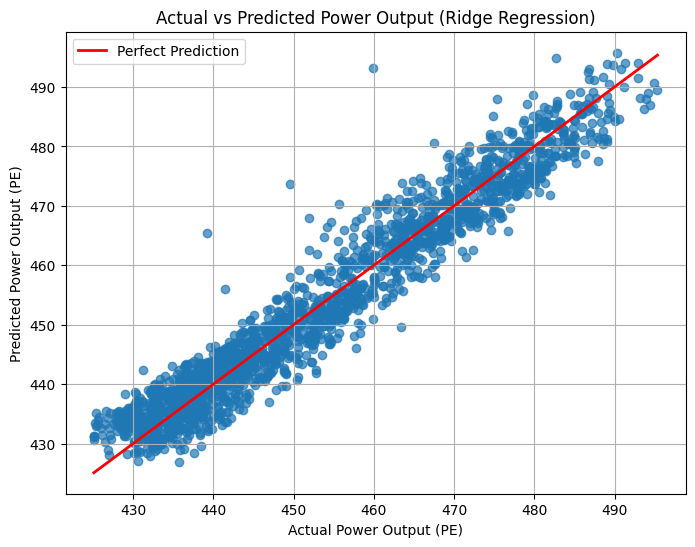

In [15]:
plt.figure(figsize=(8, 6))

plt.scatter(Y_test, y_pred, alpha=0.7)
plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    color='red',
    linewidth=2,
    label='Perfect Prediction'
)

plt.xlabel("Actual Power Output (PE)")
plt.ylabel("Predicted Power Output (PE)")
plt.title("Actual vs Predicted Power Output (Ridge Regression)")
plt.legend()
plt.grid(True)
plt.show()
